Multiple Linear Regression

1.Performing EDA for given dataset

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,classification_report
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge


In [4]:
#from google.colab import files  # Use 'files' instead of 'file'
#uploaded_files = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [6]:
data=pd.read_csv(R"ToyotaCorolla - MLR.csv")
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
# Select numerical columns and create a new DataFrame
#numerical_data = data1.select_dtypes(include='number')

# If you want to modify the original 'data' DataFrame, do this:
#data = numerical_data

In [7]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [8]:
data.shape

(1436, 11)

In [9]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [10]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [12]:
data[data.duplicated()]
#This filters the DataFrame data, returning only the rows where data.duplicated() is True,
# effectively providing all the duplicate rows except the first occurrence.



,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data[data.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


In [15]:
correlation=data.corr(numeric_only=True)
correlation

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,NaN,0.021238,1.000000


Data Encoding : categorical to numerical

In [16]:
label=LabelEncoder()
data["Fuel_Type"]=label.fit_transform(data["Fuel_Type"])
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [17]:
data.dtypes=='object'

Price        False
Age_08_04    False
KM           False
Fuel_Type    False
HP           False
Automatic    False
cc           False
Doors        False
Cylinders    False
Gears        False
Weight       False
dtype: bool

<Axes: >

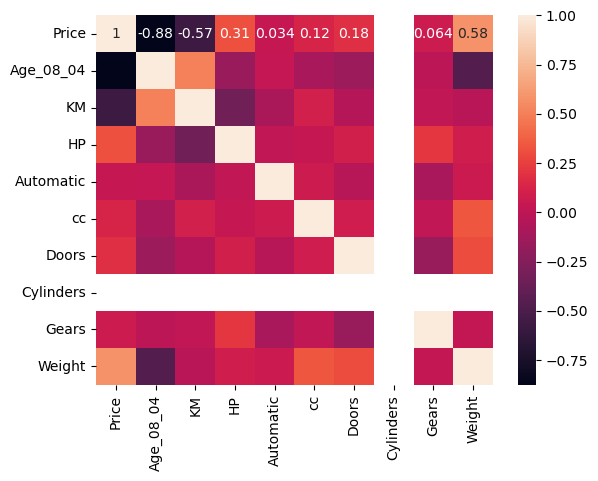

In [18]:
sns.heatmap(correlation,annot=True)

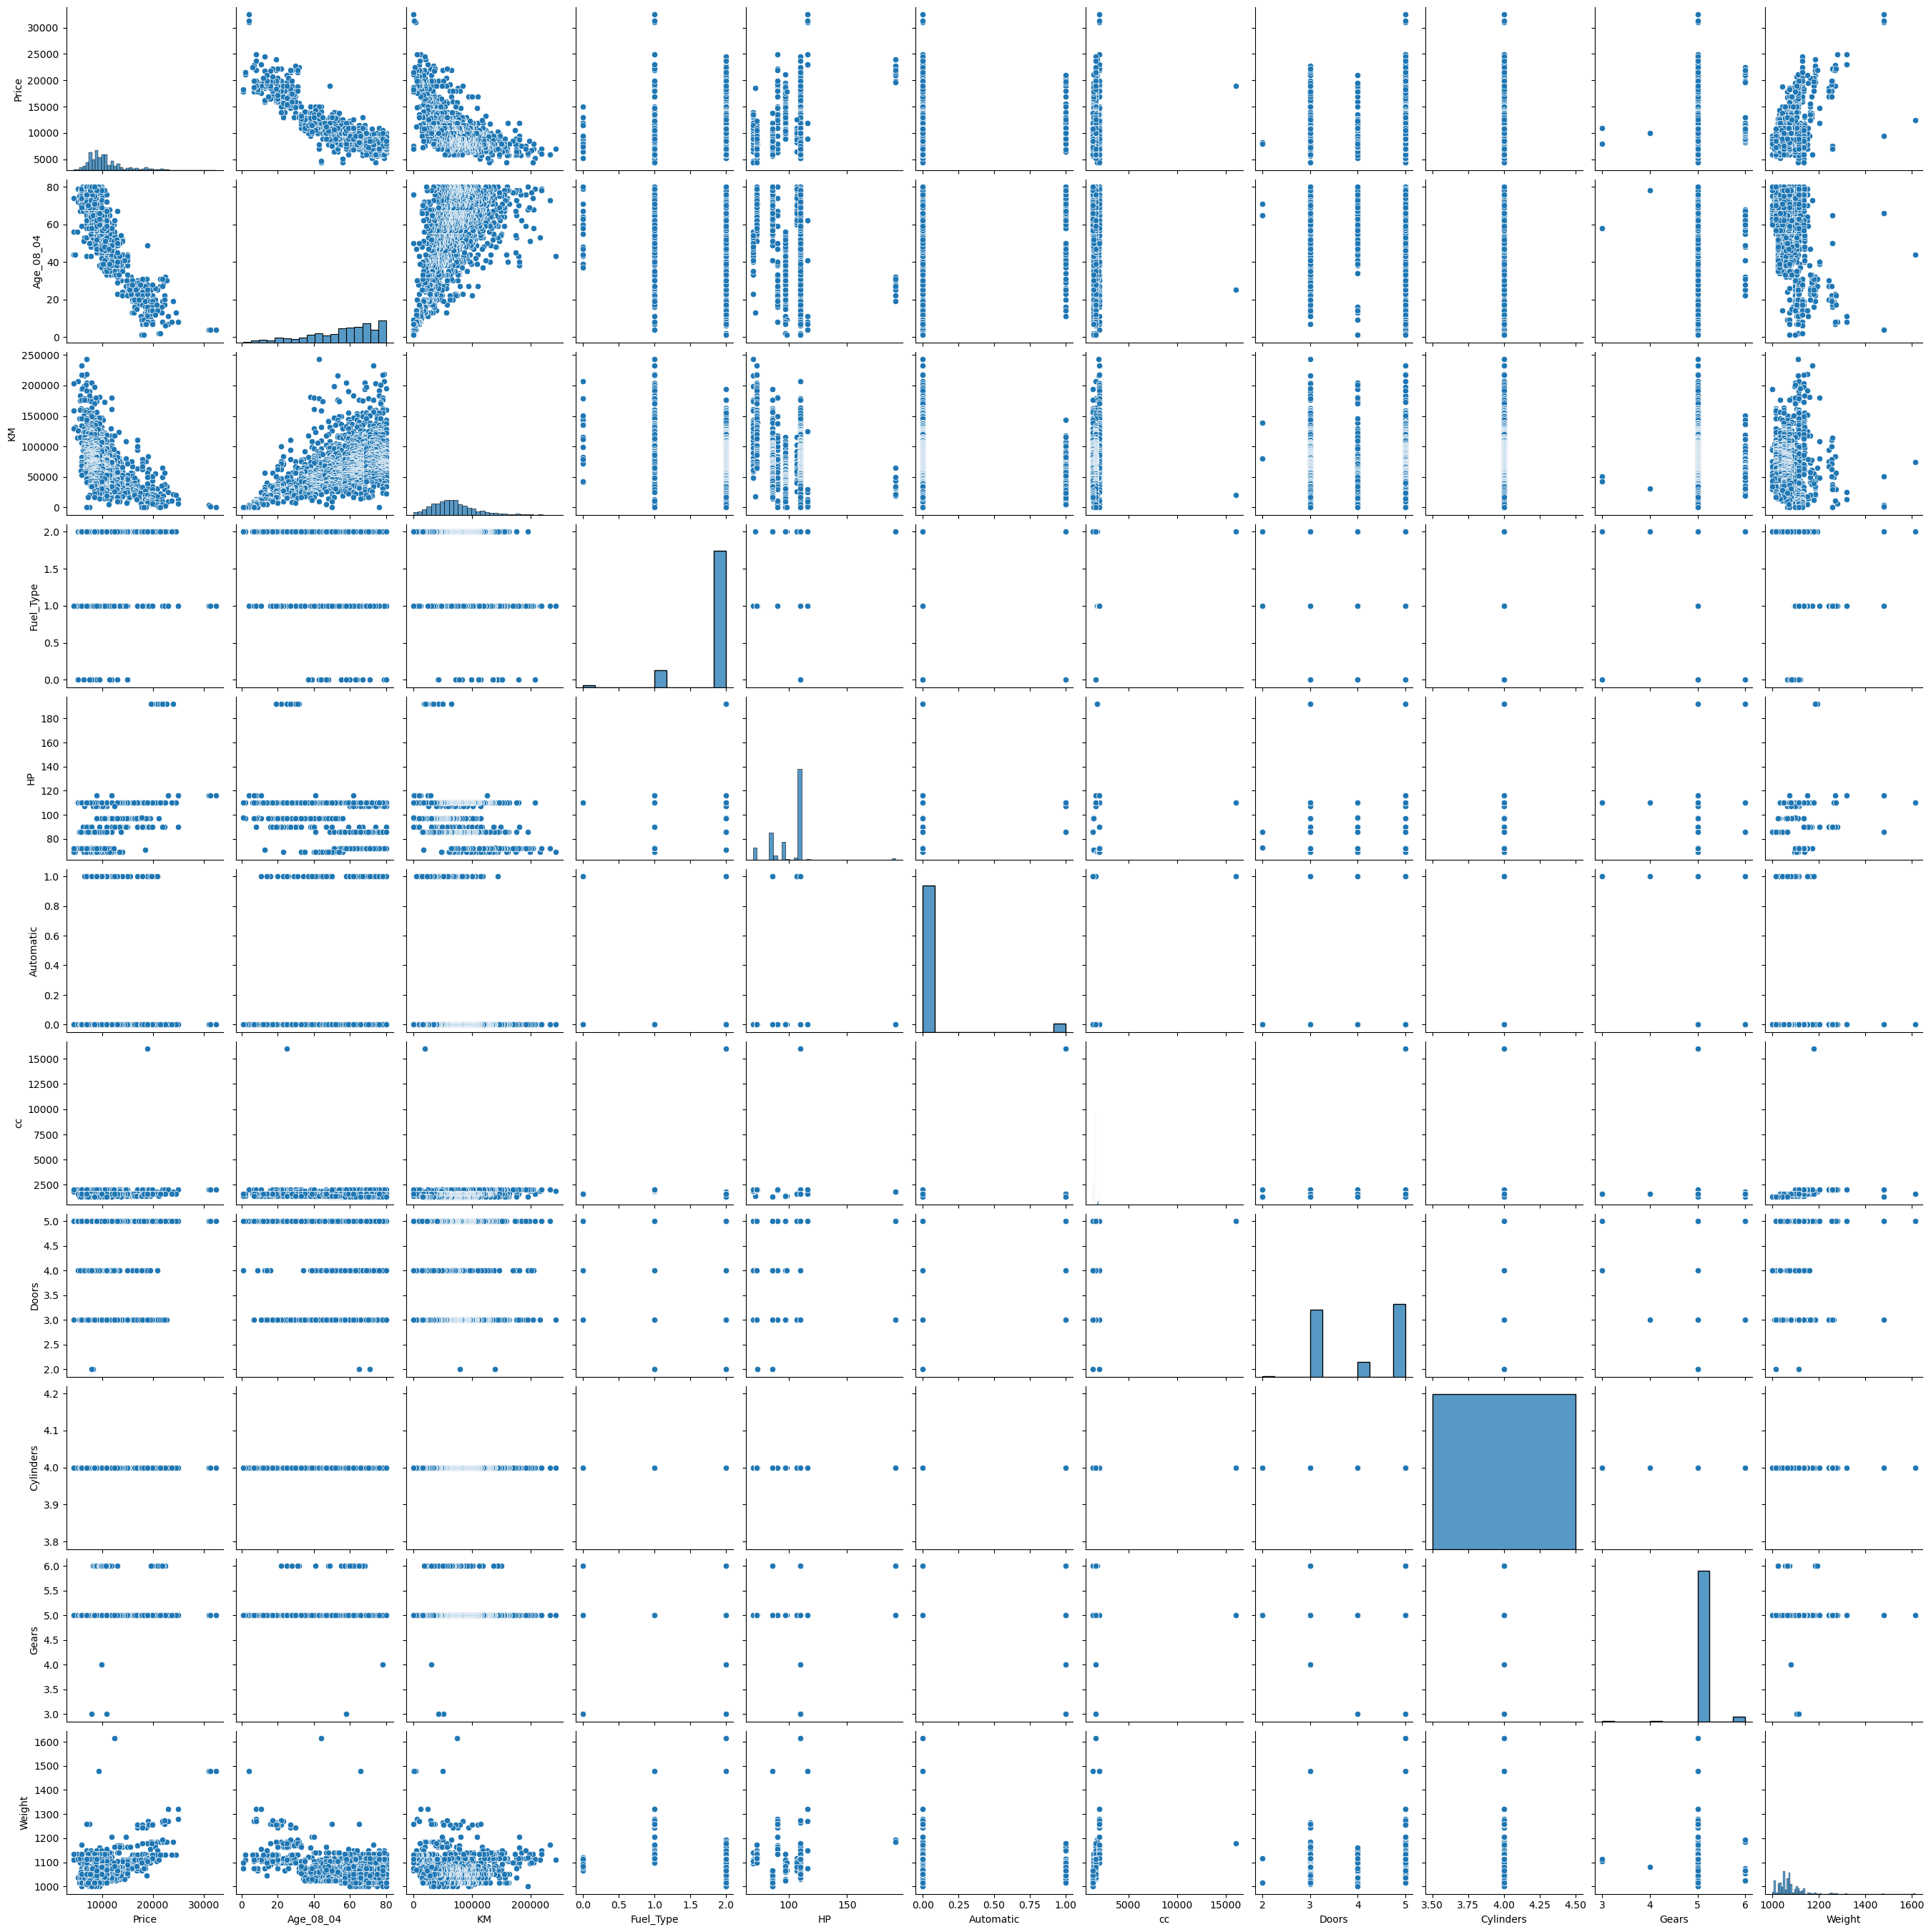

In [19]:
sns.pairplot(data)

Data Visualization

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'Fuel_Type'}>,
        <Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>],
       [<Axes: title={'center': 'cc'}>,
        <Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'Gears'}>,
        <Axes: title={'center': 'Weight'}>, <Axes: >]], dtype=object)

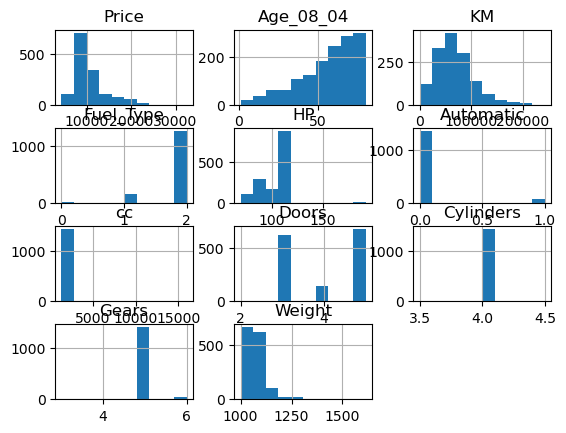

In [20]:
data.hist()

<Axes: xlabel='Fuel_Type', ylabel='count'>

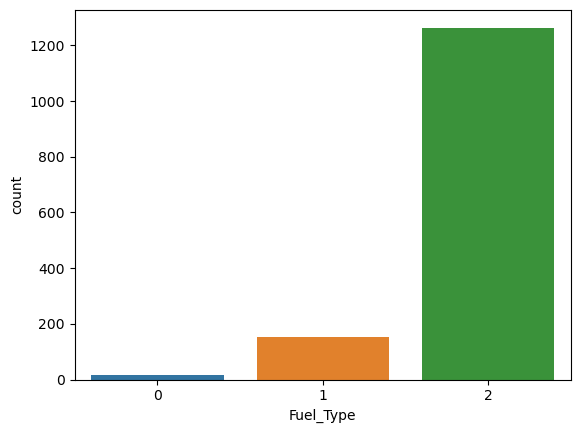

In [21]:
sns.countplot(x='Fuel_Type',data=data)

<Axes: >

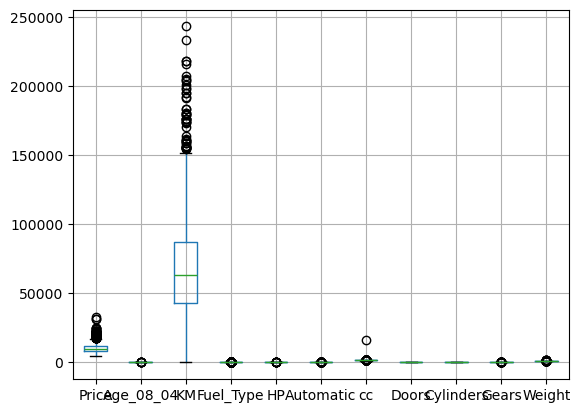

In [22]:
data.boxplot()

Removing outlier

In [23]:
# Detect outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def detect_outliers_iqr(data):
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# A  ply the function to the dataframe
outliers = detect_outliers_iqr(data)

# Print outliers summary
print(outliers.sum()/len(data)*100)

Price         7.595819
Age_08_04     0.487805
KM            3.414634
Fuel_Type    11.916376
HP            0.766551
Automatic     5.574913
cc            8.501742
Doors         0.000000
Cylinders     0.000000
Gears         3.205575
Weight        4.529617
dtype: float64


In [24]:
# Remove outliers from the dataframe
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
18,16750,24,25563,2,110,0,1600,3,4,5,1065
19,16950,30,64359,2,110,0,1600,3,4,5,1105
20,15950,30,67660,2,110,0,1600,3,4,5,1105
22,15950,28,56349,2,110,0,1600,3,4,5,1120
23,16950,28,32220,2,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


<Axes: >

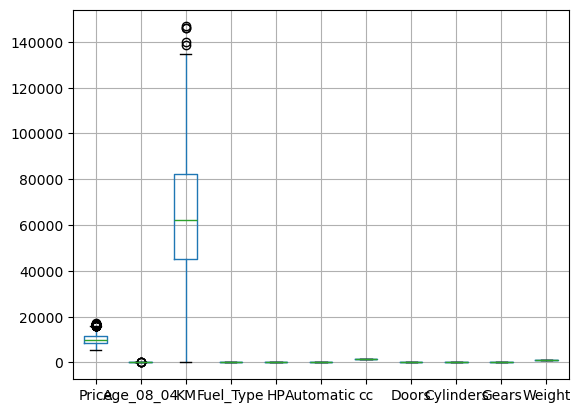

In [26]:
data.boxplot()

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [28]:
x=data.drop(["Price"],axis=1)
y=data['Price']
print(x,y)

      Age_08_04     KM  Fuel_Type   HP  Automatic    cc  Doors  Cylinders  \
18           24  25563          2  110          0  1600      3          4   
19           30  64359          2  110          0  1600      3          4   
20           30  67660          2  110          0  1600      3          4   
22           28  56349          2  110          0  1600      3          4   
23           28  32220          2  110          0  1600      3          4   
...         ...    ...        ...  ...        ...   ...    ...        ...   
1431         69  20544          2   86          0  1300      3          4   
1432         72  19000          2   86          0  1300      3          4   
1433         71  17016          2   86          0  1300      3          4   
1434         70  16916          2   86          0  1300      3          4   
1435         76      1          2  110          0  1600      5          4   

      Gears  Weight  
18        5    1065  
19        5    1105  
20       

In [32]:
data.reset_index(inplace=True)
data

,level_0,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0,18,16750,24,25563,2,110,0,1600,3,4,5,1065
1,1,19,16950,30,64359,2,110,0,1600,3,4,5,1105
2,2,20,15950,30,67660,2,110,0,1600,3,4,5,1105
3,3,22,15950,28,56349,2,110,0,1600,3,4,5,1120
4,4,23,16950,28,32220,2,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,1054,1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1055,1055,1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1056,1056,1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1057,1057,1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [35]:
x_tarin,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [31]:
#print(x_train)

NameError: name 'x_train' is not defined

In [36]:
# In the cell where you performed the train_test_split (likely ipython-input-134-a3d7b564c75c)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [37]:
x_tarin.shape,x_test.shape,y_train.shape,y_test.shape

((847, 10), (212, 10), (847,), (212,))

3.Applying MLR to training dataset

create model and fit it

In [38]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.


On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [39]:
r_sq=model.score(x_train,y_train)
print("coefficient of determination:",r_sq)

coefficient of determination: 0.8310670832581863


In [40]:
print("Intercept:",model.intercept_)

Intercept: 10016.656434474615


In [41]:
print("coefficients:",model.coef_)

coefficients: [-1.71777291e+03 -3.06158196e+02 -5.68434189e-14 -9.09014596e+02
 -6.25277607e-13  8.12051974e+02 -5.91934325e+01  0.00000000e+00
  0.00000000e+00  6.10719126e+02]


In [42]:
y_pred=model.predict(x_test)
print("Predicted response:",y_pred)

Predicted response: [10140.14986147 10219.82696082 10999.56654324  9510.01640933
  8358.55256622  8638.46669786  9884.55164018  9415.58779332
 13429.62770897 12959.3365334  11457.45928959  7270.59895188
 12658.33148939  8385.09645614  9958.88405387 12253.65497784
 10204.44408986  8377.59896576 12903.24179059  7795.19513384
  9493.88706556  9194.1480997   9471.95016426 10402.33312817
  8298.75324966 13404.00066584 15379.84522871  9307.90571764
 12543.29132521  8823.83991509  9350.51098564  8099.74959448
  9581.17261174 10936.71859007  8224.02510678  7420.77244213
  9235.2834369   6719.83430307 10305.3071321   7264.30890183
  8093.83650014  7565.67664605  9810.98978272 10729.31131558
 10364.83085296  8572.62797247  7937.82579307  8472.04392282
 10833.8442515  11376.16207164 11709.85228668 10852.70270078
 11216.33766614 11218.34309655 12326.15353102  7704.50139789
  8824.44943688 10194.48641193 12988.48543786 15732.80275397
 10423.27045095  9449.86656089  7265.35822724 10155.64054067
  78

In [43]:
print(r2_score(y_pred,y_test))

0.7653416466059327


In [44]:
print('MSE',y_pred,y_test)

MSE [10140.14986147 10219.82696082 10999.56654324  9510.01640933
  8358.55256622  8638.46669786  9884.55164018  9415.58779332
 13429.62770897 12959.3365334  11457.45928959  7270.59895188
 12658.33148939  8385.09645614  9958.88405387 12253.65497784
 10204.44408986  8377.59896576 12903.24179059  7795.19513384
  9493.88706556  9194.1480997   9471.95016426 10402.33312817
  8298.75324966 13404.00066584 15379.84522871  9307.90571764
 12543.29132521  8823.83991509  9350.51098564  8099.74959448
  9581.17261174 10936.71859007  8224.02510678  7420.77244213
  9235.2834369   6719.83430307 10305.3071321   7264.30890183
  8093.83650014  7565.67664605  9810.98978272 10729.31131558
 10364.83085296  8572.62797247  7937.82579307  8472.04392282
 10833.8442515  11376.16207164 11709.85228668 10852.70270078
 11216.33766614 11218.34309655 12326.15353102  7704.50139789
  8824.44943688 10194.48641193 12988.48543786 15732.80275397
 10423.27045095  9449.86656089  7265.35822724 10155.64054067
  7897.52916205 1308

In [45]:
print('MAE',y_pred,y_test)

MAE [10140.14986147 10219.82696082 10999.56654324  9510.01640933
  8358.55256622  8638.46669786  9884.55164018  9415.58779332
 13429.62770897 12959.3365334  11457.45928959  7270.59895188
 12658.33148939  8385.09645614  9958.88405387 12253.65497784
 10204.44408986  8377.59896576 12903.24179059  7795.19513384
  9493.88706556  9194.1480997   9471.95016426 10402.33312817
  8298.75324966 13404.00066584 15379.84522871  9307.90571764
 12543.29132521  8823.83991509  9350.51098564  8099.74959448
  9581.17261174 10936.71859007  8224.02510678  7420.77244213
  9235.2834369   6719.83430307 10305.3071321   7264.30890183
  8093.83650014  7565.67664605  9810.98978272 10729.31131558
 10364.83085296  8572.62797247  7937.82579307  8472.04392282
 10833.8442515  11376.16207164 11709.85228668 10852.70270078
 11216.33766614 11218.34309655 12326.15353102  7704.50139789
  8824.44943688 10194.48641193 12988.48543786 15732.80275397
 10423.27045095  9449.86656089  7265.35822724 10155.64054067
  7897.52916205 1308

In [46]:
residual=y_test-y_pred
residual

849     -190.149861
503     -229.826961
205      500.433457
974      939.983591
1251     141.447434
           ...     
131      348.371765
267        3.068938
794     1683.648695
56       668.757572
207     -364.347794
Name: Price, Length: 212, dtype: float64

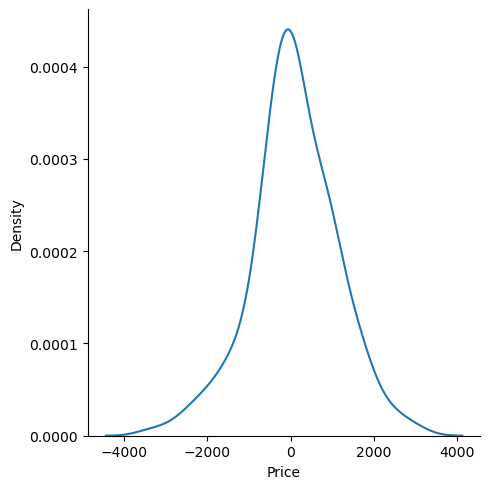

In [47]:
sns.displot(residual,kind='kde')

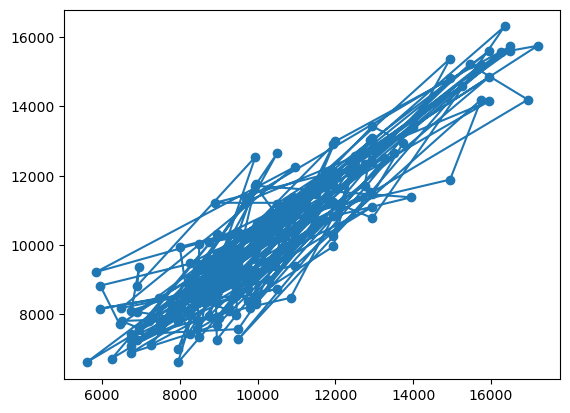

In [48]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_pred)

Evaluation metrics;

5.Apply Lasso and Ridge methods on the model.

#

In [49]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
lasso_pred = lasso_model.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)
ridge_pred = ridge_model.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print("Lasso MSE:", lasso_mse)
print("Ridge MSE:", ridge_mse)

Lasso MSE: 1069824.0526353382
Ridge MSE: 1069782.0298042144


Graph Visualization

Interview Questions:

1.What is Normalization & Standardization and how is it helpful?

 Ans;Normalization in data-science refers to the process of scalling numeric features to a common range,typically between 0 and 1. The goal of normalization is to bring all the features into a similer scale,which is perticularly important for algorithms that are sensitive to the scale of the features

Standardization in data-science refers to the process of transforming data in such a way that it has mean of 0 and standard deviation of 1. This process is also known as z-score normalization

2.What techniques can be used to address multicollinearity in multiple linear regression?

Ans; Multicollinearity occurs when independent variables in a regression model are highly correlated with each other. This can cause issues in multiple linear regression, such as unstable coefficients estimates and difficulties in interpreting the importance of individual predictors.